In [1]:
 pip install opencv-python==4.5.3.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dis

In [6]:
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pickle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Import data
path = os.listdir(
    r'/content/drive/MyDrive/Lung Disease Dataset/train')
classes = {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1,
           'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}

In [10]:
X = []
Y = []
for cls in classes:
    pth = r'/content/drive/MyDrive/Lung Disease Dataset/train'+cls
    if cls == "Bacterial Pneumonia":
        pth = r"/content/drive/MyDrive/Lung Disease Dataset/train/Bacterial Pneumonia"
    elif cls == "Corona Virus Disease":
        pth = r"/content/drive/MyDrive/Lung Disease Dataset/train/Corona Virus Disease"
    elif cls == "Normal":
        pth = r"/content/drive/MyDrive/Lung Disease Dataset/train/Normal"
    elif cls == "Tuberculosis":
        pth = r"/content/drive/MyDrive/Lung Disease Dataset/train/Tuberculosis"
    elif cls == "Viral Pneumonia":
        pth = r"/content/drive/MyDrive/Lung Disease Dataset/train/Viral Pneumonia"

    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

print(np.unique(Y))

X = np.array(X)
Y = np.array(Y)

print(pd.Series(Y).value_counts())

X.shape

[0 1 2 3 4]
3    1220
1    1218
2    1207
0    1205
4    1204
Name: count, dtype: int64


(6054, 200, 200)

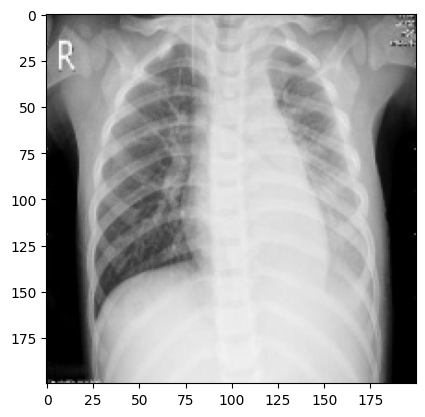

In [11]:
# Visualize Data - To check particular image
plt.imshow(X[1000], cmap='gray')
plt.show()

In [12]:
X_updated = X.reshape(len(X), -1)
print(X_updated.shape)

(6054, 40000)


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_updated, Y, random_state=10, test_size=.20)

print(xtrain.shape, xtest.shape)

(4843, 40000) (1211, 40000)


In [14]:
# Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
# Train Model
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [16]:
# Evaluation
print("Training Score : ", lg.score(xtrain, ytrain))
print("Testing Score : ", lg.score(xtest, ytest))

Training Score :  0.7596531075779476
Testing Score :  0.6251032204789431


In [17]:
pred=lg.predict(xtest)

In [18]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   0,    1,    4,    6,   10,   11,   13,   14,   16,   19,   22,
          23,   29,   30,   35,   39,   41,   42,   54,   55,   56,   58,
          62,   63,   66,   73,   74,   76,   78,   83,   85,   86,   87,
          88,   89,   90,   91,   97,   98,   99,  102,  104,  106,  109,
         110,  113,  114,  116,  119,  123,  126,  128,  129,  130,  133,
         135,  140,  142,  145,  146,  147,  148,  151,  156,  158,  159,
         161,  162,  167,  173,  177,  178,  179,  182,  183,  184,  192,
         193,  194,  199,  205,  207,  223,  224,  227,  238,  246,  247,
         248,  251,  256,  262,  264,  266,  268,  270,  273,  274,  276,
         280,  285,  287,  288,  289,  291,  292,  297,  306,  307,  311,
         313,  314,  315,  317,  320,  321,  322,  323,  331,  334,  335,
         337,  338,  341,  343,  344,  346,  347,  351,  354,  358,  360,
         367,  368,  369,  370,  371,  372,  377,  379,  380,  383,  384,
         388,  390,  393,  395,  397, 

In [19]:
print("Total Misclassified Samples:", len(misclassified[0]))
print(pred[351], ytest[351])

Total Misclassified Samples: 454
4 0


<Axes: >

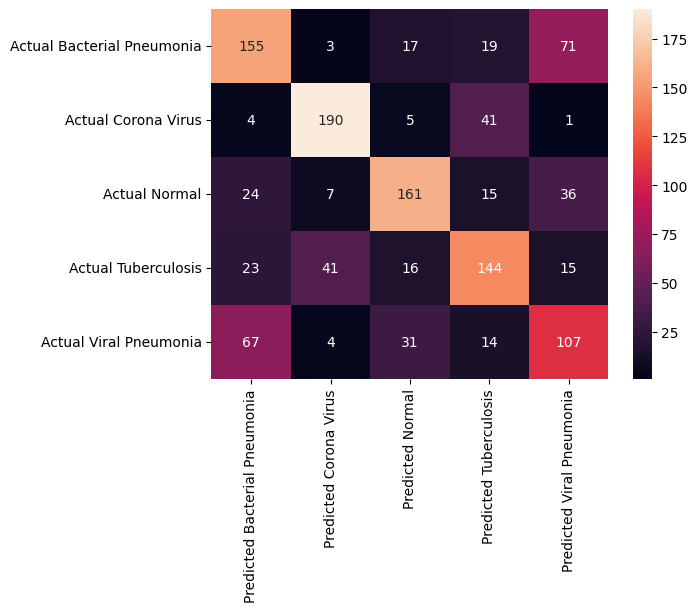

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(ytest, pred, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [21]:
from sklearn import metrics
classification_metrics = metrics.classification_report(ytest, pred,
                                                      target_names =['BACTERIAL PNEUMONIA','CORONA','NORMAL','TUBERCULOSIS','VIRAL PNEUMONIA'])
print(classification_metrics)

                     precision    recall  f1-score   support

BACTERIAL PNEUMONIA       0.57      0.58      0.58       265
             CORONA       0.78      0.79      0.78       241
             NORMAL       0.70      0.66      0.68       243
       TUBERCULOSIS       0.62      0.60      0.61       239
    VIRAL PNEUMONIA       0.47      0.48      0.47       223

           accuracy                           0.63      1211
          macro avg       0.63      0.62      0.62      1211
       weighted avg       0.63      0.63      0.63      1211



In [22]:
warnings.filterwarnings('ignore')
sv = SVC(C=0.1)
sv.fit(xtrain, ytrain)

SVC(C=0.1)

In [23]:
print("Training Score : ", sv.score(xtrain, ytrain))
print("Testing Score : ", sv.score(xtest, ytest))

Training Score :  0.7218666116043775
Testing Score :  0.6936416184971098


In [24]:
import cv2

#X and Y are lists.
X = []
Y = []

for cls in classes:

    if cls=="bacterial_pneumonia":
       pth=r"/content/drive/MyDrive/Lung Disease Dataset/train/Bacterial Pneumonia"
    elif cls=="corona_virus":
       pth=r"//content/drive/MyDrive/Lung Disease Dataset/train/Corona Virus Disease"
    elif cls=="normal":
       pth=r"/content/drive/MyDrive/Lung Disease Dataset/train/Normal"
    elif cls=="tuberculosis":
       pth=r"/content/drive/MyDrive/Lung Disease Dataset/train/Tuberculosis"
    elif cls=="viral_pneumonia":
       pth=r"/content/drive/MyDrive/Lung Disease Dataset/train/Tuberculosis"

    print(cls)


    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        # 0 here is to read image in grayscale mode.
     #
        img = cv2.resize(img,(200,200))
        #(200,200) follows the order (width,height).

        #append() inserts its argument as a single element to the end of the list.
        #the length of the list increases by one.
        X.append(img)
        Y.append(classes[cls])

Bacterial Pneumonia
Corona Virus Disease
Normal
Tuberculosis
Viral Pneumonia


In [25]:
pred=sv.predict(xtest)

In [26]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   6,    8,   10,   12,   13,   14,   16,   22,   28,   29,   30,
          35,   37,   39,   45,   55,   57,   63,   66,   70,   76,   78,
          79,   81,   83,   85,   86,   88,   89,   90,   93,   97,   99,
         101,  102,  104,  106,  109,  113,  114,  116,  119,  128,  132,
         133,  135,  140,  146,  147,  148,  151,  156,  158,  159,  161,
         164,  167,  169,  173,  179,  180,  183,  184,  193,  194,  196,
         199,  205,  217,  218,  223,  246,  247,  251,  254,  256,  262,
         266,  268,  270,  273,  274,  276,  279,  280,  285,  287,  289,
         290,  296,  304,  306,  307,  310,  312,  313,  315,  317,  320,
         321,  325,  333,  334,  336,  341,  343,  344,  347,  354,  356,
         362,  368,  369,  371,  372,  379,  380,  387,  390,  395,  397,
         402,  405,  420,  423,  437,  438,  440,  442,  444,  445,  447,
         448,  449,  452,  457,  458,  461,  462,  467,  468,  477,  478,
         479,  480,  482,  487,  497, 

In [27]:
print("Total Misclassified Samples:", len(misclassified[0]))
print(pred[351], ytest[351])

Total Misclassified Samples: 371
0 0


<Axes: >

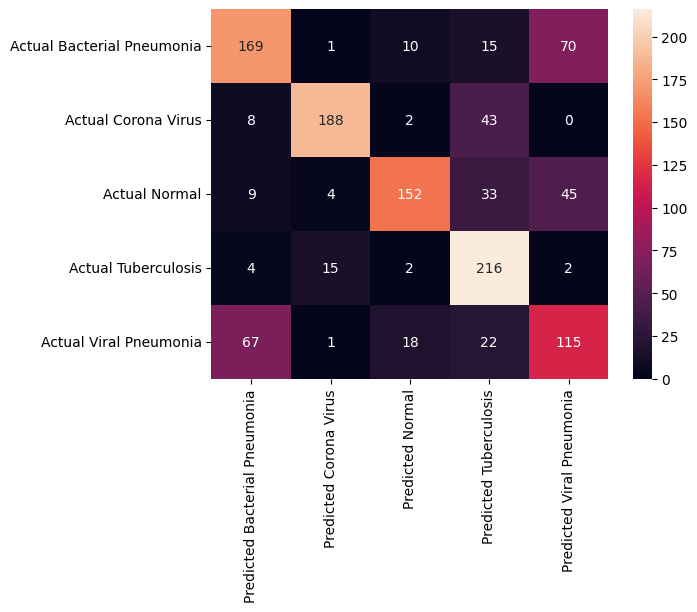

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(ytest, pred, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
from sklearn import metrics
classification_metrics = metrics.classification_report(ytest, pred,
                                                      target_names =['BACTERIAL PNEUMONIA','CORONA','NORMAL','TUBERCULOSIS','VIRAL PNEUMONIA'])
print(classification_metrics)

                     precision    recall  f1-score   support

BACTERIAL PNEUMONIA       0.66      0.64      0.65       265
             CORONA       0.90      0.78      0.84       241
             NORMAL       0.83      0.63      0.71       243
       TUBERCULOSIS       0.66      0.90      0.76       239
    VIRAL PNEUMONIA       0.50      0.52      0.51       223

           accuracy                           0.69      1211
          macro avg       0.71      0.69      0.69      1211
       weighted avg       0.71      0.69      0.69      1211



In [30]:
# Test Model
dec= {1:'Bacterial Pneumonia', 2:'Corona Virus Disease',
           0:'Normal', 3:'Tuberculosis', 4:'Viral Pneumonia'}

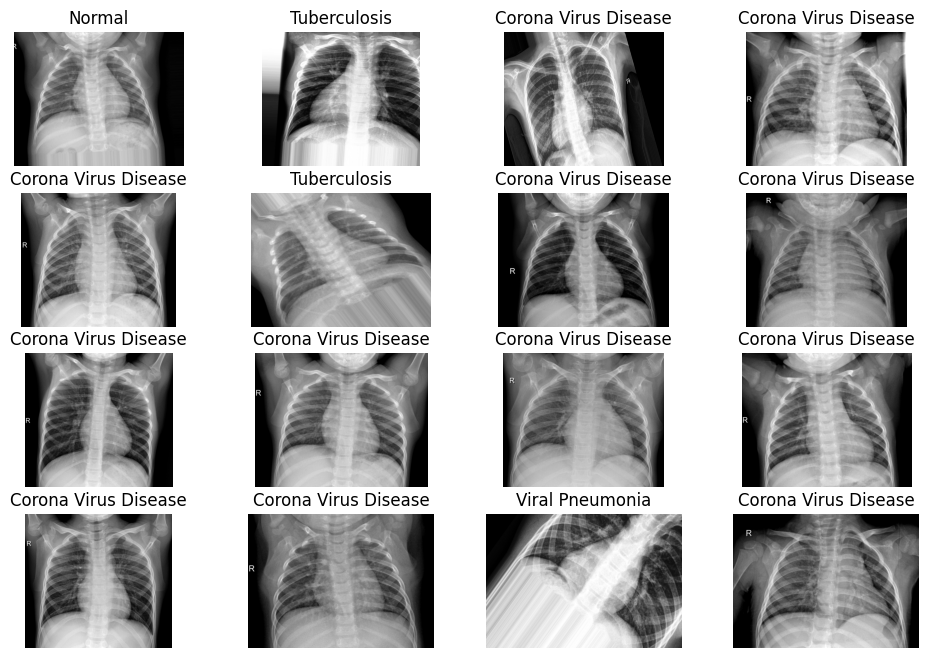

In [31]:
plt.figure(figsize=(12, 8))
p = os.listdir(r'/content/drive/MyDrive/Lung Disease Dataset/val')
c = 1
for i in os.listdir(r'/content/drive/MyDrive/Lung Disease Dataset/val/Normal/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread(r'/content/drive/MyDrive/Lung Disease Dataset/val/Normal/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

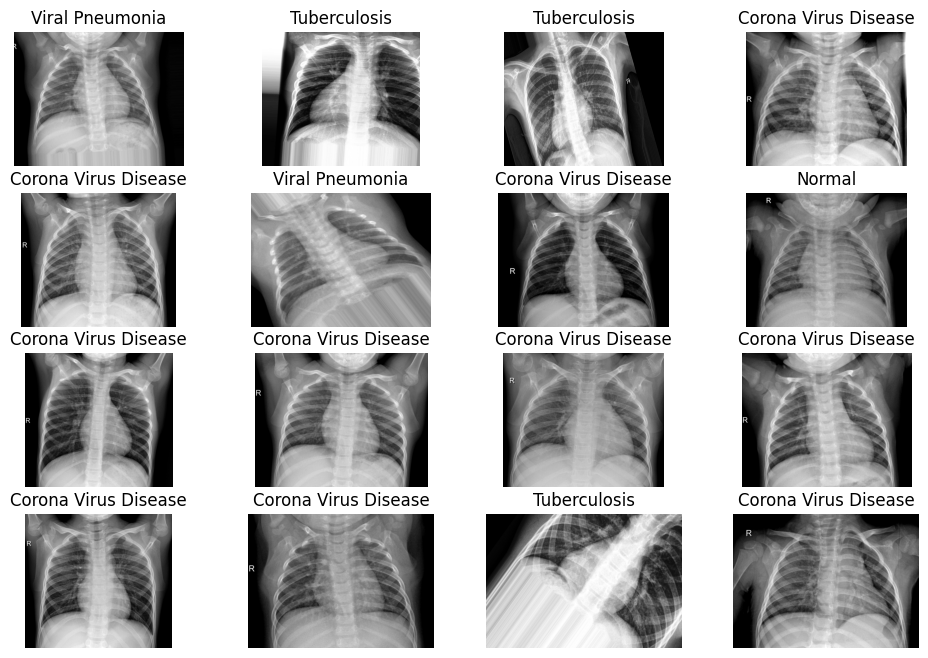

In [32]:
plt.figure(figsize=(12, 8))
p = os.listdir(r'/content/drive/MyDrive/Lung Disease Dataset/val')
c = 1
for i in os.listdir(r'/content/drive/MyDrive/Lung Disease Dataset/val/Normal/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread(r'/content/drive/MyDrive/Lung Disease Dataset/val/Normal/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1